In [224]:
import pymol
from pymol import cmd
import os
import numpy as np
import prody
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## Задание 1

In [19]:
with open('6K2K.pdb') as f:
    cmd.do("fetch 6k2k")
    cmd.do("unset all_states")
    cmd.do("split_states 6k2k")
    cmd.do("delete 6k2k")
    distances = []
    for state in range(1, 21):
        dist = round(cmd.get_distance(f"6k2k_{state:04d} and resi 313 and name N", f"6k2k_{state:04d} and resi 347 and name O"), 2)
        distances.append(dist)
print()
print('Parameters')
print('----------')
print('mean', round(np.mean(distances), 2), 'sd', round(np.std(distances), 2), 'min', min(distances), 'max', max(distances), 'median', round(np.median(distances), 2))
print(sorted(list(zip(range(1,21), distances)), key=lambda x: x[1]))

PyMOL>fetch 6k2k
TITLE     Solution structure of MUL1-RING domain
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "./6k2k.cif" loaded as "6k2k".
PyMOL>unset all_states
 Setting: all_states restored to default (off)
PyMOL>split_states 6k2k
PyMOL>delete 6k2k

Parameters
----------
mean 2.82 sd 0.03 min 2.77 max 2.89 median 2.82
[(6, 2.77), (9, 2.77), (15, 2.77), (2, 2.78), (8, 2.78), (19, 2.8), (4, 2.81), (17, 2.81), (18, 2.81), (3, 2.82), (13, 2.82), (14, 2.82), (1, 2.83), (7, 2.84), (20, 2.84), (5, 2.85), (16, 2.85), (11, 2.86), (12, 2.86), (10, 2.89)]


In [20]:
with open('6K2K.pdb') as f:
    cmd.do("fetch 6k2k")
    cmd.do("unset all_states")
    cmd.do("split_states 6k2k")
    cmd.do("delete 6k2k")
    distances = []
    for state in range(1, 21):
        dist = round(cmd.get_distance(f"6k2k_{state:04d} and resi 311 and name OG", f"6k2k_{state:04d} and resi 324 and name OG1"), 2)
        distances.append(dist)
print()
print('Parameters')
print('----------')
print('mean', round(np.mean(distances), 2), 'sd', round(np.std(distances), 2), 'min', min(distances), 'max', max(distances), 'median', round(np.median(distances), 2))
print(sorted(list(zip(range(1,21), distances)), key=lambda x: x[1]))

PyMOL>fetch 6k2k
TITLE     Solution structure of MUL1-RING domain
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "./6k2k.cif" loaded as "6k2k".
PyMOL>unset all_states
 Setting: all_states restored to default (off)
PyMOL>split_states 6k2k
PyMOL>delete 6k2k

Parameters
----------
mean 4.52 sd 0.71 min 3.56 max 5.98 median 4.6
[(2, 3.56), (15, 3.6), (6, 3.73), (17, 3.73), (9, 3.8), (1, 3.97), (19, 3.97), (3, 4.06), (14, 4.07), (7, 4.52), (13, 4.68), (18, 4.71), (16, 4.8), (11, 4.85), (8, 4.97), (20, 5.08), (10, 5.35), (4, 5.43), (5, 5.62), (12, 5.98)]


In [21]:
with open('6K2K.pdb') as f:
    cmd.do("fetch 6k2k")
    cmd.do("unset all_states")
    cmd.do("split_states 6k2k")
    cmd.do("delete 6k2k")
    distances = []
    for state in range(1, 21):
        dist = round(cmd.get_distance(f"6k2k_{state:04d} and resi 343 and name N", f"6k2k_{state:04d} and resi 334 and name O"), 2)
        distances.append(dist)
print()
print('Parameters')
print('----------')
print('mean', round(np.mean(distances), 2), 'sd', round(np.std(distances), 2), 'min', min(distances), 'max', max(distances), 'median', round(np.median(distances), 2))
print(sorted(list(zip(range(1,21), distances)), key=lambda x: x[1]))

PyMOL>fetch 6k2k
TITLE     Solution structure of MUL1-RING domain
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "./6k2k.cif" loaded as "6k2k".
PyMOL>unset all_states
 Setting: all_states restored to default (off)
PyMOL>split_states 6k2k
PyMOL>delete 6k2k

Parameters
----------
mean 3.11 sd 0.09 min 2.9 max 3.21 median 3.14
[(13, 2.9), (7, 2.98), (9, 2.98), (5, 3.0), (10, 3.05), (11, 3.08), (12, 3.08), (20, 3.08), (8, 3.09), (19, 3.12), (2, 3.16), (3, 3.16), (6, 3.16), (16, 3.18), (1, 3.19), (17, 3.19), (15, 3.2), (4, 3.21), (14, 3.21), (18, 3.21)]


## Задание 2

В ассиметрической ячейке 6M2C 8 белков, и только 4 из них соответствуют нужному белку (цепи E-H). Усредним значения b-факторов.

In [180]:
nmr_model = prody.parsePDB('6k2k')
RMSFs = [np.mean(prody.calcRMSF(res)) for res in nmr_model.iterResidues() if res.protein]
xray_model = prody.parsePDB('6m2c')
b_factors = [[np.mean(res.getBetas()) for res in chain.iterResidues() if res.protein] 
             for chain in xray_model.iterChains() if chain.getChid() in ['E','F','G','H']]
b_factors_per_chain = [[np.mean(res.getBetas()) for res in chain.iterResidues() if res.protein] 
             for chain in xray_model.iterChains() if chain.getChid() in ['E','F','G','H']]
b_factors = np.mean(b_factors, axis=0)

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> Downloading PDB files via FTP failed, trying HTTP.
@> 6k2k downloaded (6k2k.pdb.gz)
@> PDB download via HTTP completed (1 downloaded, 0 failed).
@> 869 atoms and 20 coordinate set(s) were parsed in 0.08s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
@> Downloading PDB files via FTP failed, trying HTTP.
@> 6m2c downloaded (6m2c.pdb.gz)
@> PDB download via HTTP completed (1 downloaded, 0 failed).
@> 12895 atoms and 1 coordinate set(s) were parsed in 0.17s.


In [181]:
print(len(RMSFs), len(b_factors))

57 55


Проверим, с каких сторон находятся лишние аминокислоты в ЯМР-структуре. Как видим, у белка с ЯМР-структурой больше  на две аминокислоты в N-конце, поэтому их не будем брать в анализ.

In [182]:
print('NMR', '-----------', sep='\n')
print(*list(nmr_model.iterResidues())[:4])
print()
print('X-ray', '-----------', sep='\n')
for chain in xray_model.iterChains():
    if chain.getChid() == 'E':
        print(*list(chain.iterResidues())[:4])


NMR
-----------
GLY 296 SER 297 LEU 298 LYS 299

X-ray
-----------
LEU 298 LYS 299 SER 300 ALA 301


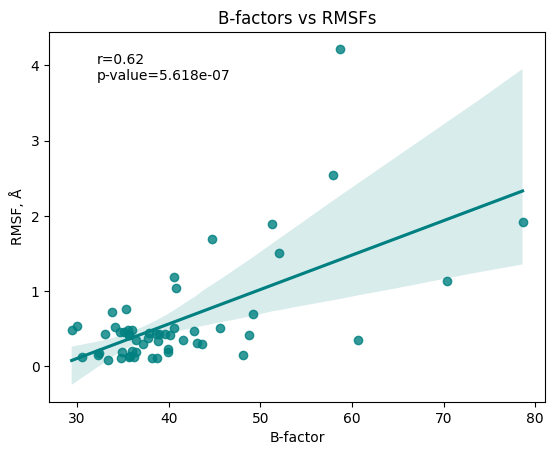

Pearson correlation coefficient = 0.62 | p-value = 5.618e-07


In [255]:
RMSF_slice = RMSFs[2:]
r, p = sp.stats.pearsonr(x=b_factors, y=RMSF_slice)

plt.title('B-factors vs RMSFs')
plt.xlabel('B-factor')
plt.ylabel('RMSF, Å')
sns.regplot(x=b_factors, y=RMSF_slice, color='teal')
plt.figtext(s=f'r={r:.02f}\np-value={round(p, 10)}', x=0.2, y=0.78)
plt.show()
print('Pearson correlation coefficient =', round(r, 2), '| p-value =', round(p, 10))

Pearson correlation coefficient = 0.53 | p-value = 3.67355e-05
Pearson correlation coefficient = 0.54 | p-value = 1.94678e-05
Pearson correlation coefficient = 0.62 | p-value = 4.233e-07
Pearson correlation coefficient = 0.55 | p-value = 1.19816e-05


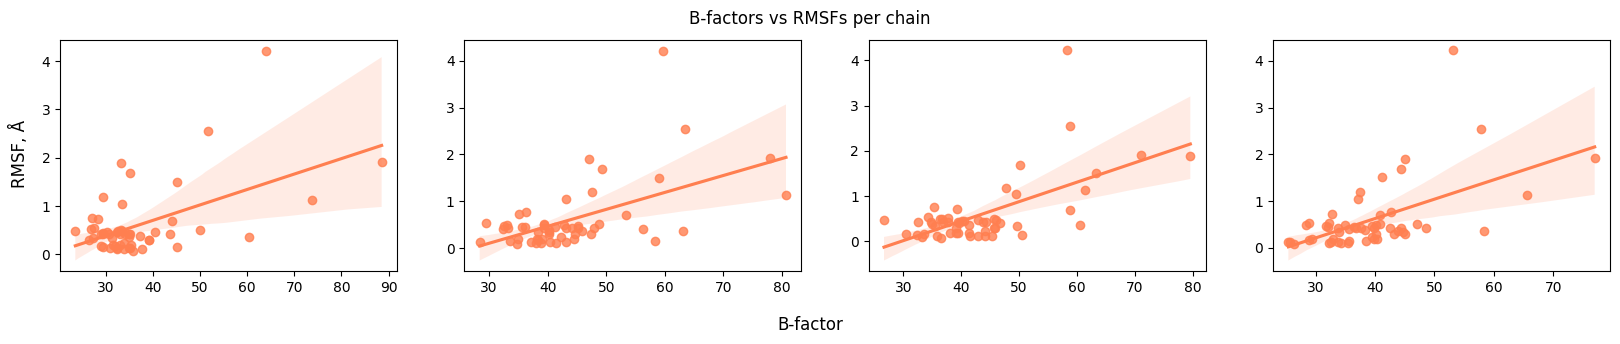

In [266]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
fig.supylabel('RMSF, Å', x=0.1)
fig.supxlabel('B-factor', y=-0.1)
plt.suptitle('B-factors vs RMSFs per chain')
for chain in range(len(b_factors_per_chain)):
    r, p = sp.stats.pearsonr(x=b_factors_per_chain[chain], y=RMSF_slice)
    sns.regplot(x=b_factors_per_chain[chain], y=RMSF_slice, ax=ax[chain], color='coral')
    print('Pearson correlation coefficient =', round(r, 2), '| p-value =', round(p, 10))
plt.show()